------------------
------------------


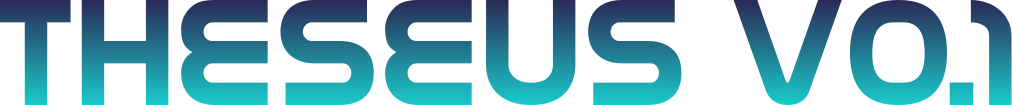

------------------
------------------


# Simulating Keplarian Coordinate List (v0.1)

### PROJECT THESEUS (v0.1) - PART 1
------------------

Artash Nath, UTAT Orbit Member

-------------------

The purpose of this notebook is to simulate a list of keplarian coordinates that give a representation of FINCH's polar orbit around the earth. It then saves the list to a NPY file.

-------------------

<b>1. Importing Libraries</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

-----------------

<b>2. Function to Generate Combinations from Arrays</b>

This function takes an input of an N number of arrays of sizes (S<sub>1</sub>, S<sub>2</sub>, S<sub>3</sub>, ...., S<sub>n</sub>) and creates a resulting array of length S<sub>1</sub> * S<sub>2</sub> * S<sub>3</sub> * ....  * S<sub>n</sub>


In [2]:
def generate_combinations(arrays, out=None):
    
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    #m = n / arrays[0].size
    m = int(n / arrays[0].size) 
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        generate_combinations(arrays[1:], out=out[0:m, 1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m, 1:] = out[0:m, 1:]
    return out

-----------------

<b>3. Using Function to Generate Combinations of 6 Keplarian Elements</b>

A combination of a range of 6 keplarian elements to simulate the sattelite's orbit around earth are created.


In [3]:
# Semi Major Axis  | SMA
# Eccentricity     | ECC
# Inclination      | INC
# Right Acension   | RAAN
# Argm. Of Perigee | AOP
# True Anomaly     | TA

start_time = time.perf_counter()

SMA = (6878000, 6928000)
ECC = (0, 0.003621614)
INC = (97.40096011, 97.59208909)

RAAN = (0, (2*np.pi))
AOP = (0, (2*np.pi))
TA = (0, (2*np.pi))

n1 = 5
n2 = 60

SMA_ARRAY = np.linspace(SMA[0], SMA[1], n1)
ECC_ARRAY = np.linspace(ECC[0], ECC[1], n1)
INC_ARRAY = np.linspace(INC[0], INC[1], n1)

RAAN_ARRAY = np.linspace(RAAN[0], RAAN[1], n2)
AOP_ARRAY = np.linspace(AOP[0], AOP[1], n2)
TA_ARRAY = np.linspace(TA[0], TA[1], n2)


Input_Database_6D = generate_combinations([SMA_ARRAY, ECC_ARRAY, INC_ARRAY, RAAN_ARRAY, AOP_ARRAY, TA_ARRAY])

end_time = time.perf_counter()
total_time = round(end_time-start_time, 3)
print("Generated {} Combinations in {} Seconds".format((n1**3)*(n2**3),total_time))
print("Database Shape : {}".format(np.shape(Input_Database_6D)))

Generated 27000000 Combinations in 0.486 Seconds
Database Shape : (27000000, 6)


-----------------

<b>4. Saving Simulated Coordinate List as .NPY file</b>

In [4]:
np.save('./data/kepl_elem_coordinates.npy', Input_Database_6D)